In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Time (years)')

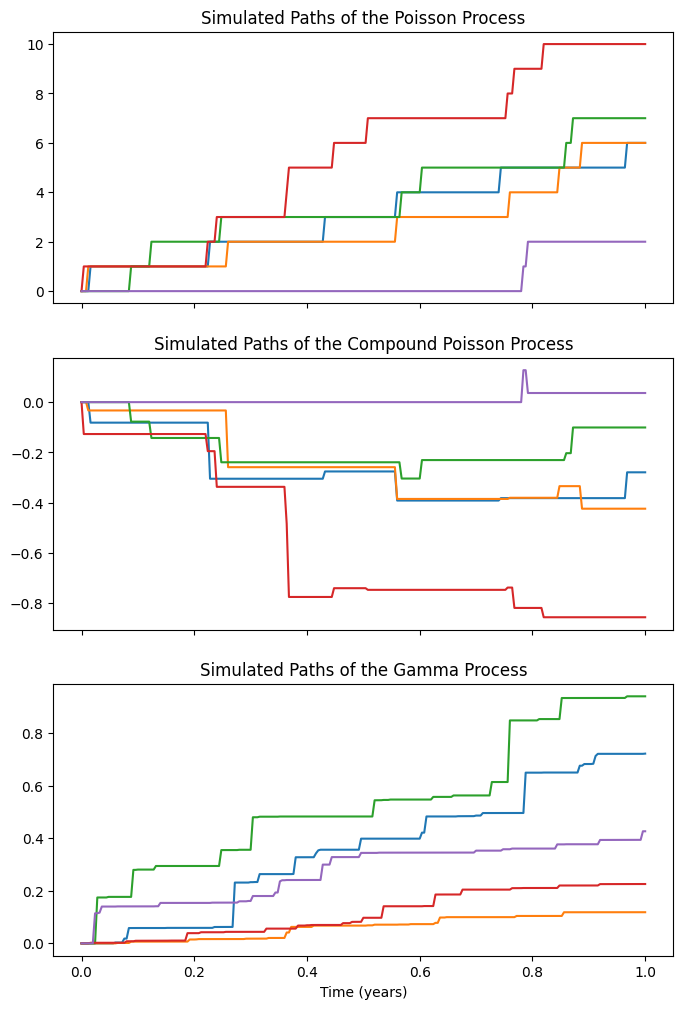

In [47]:
# SIMULATING JUMP PROCESSES 
# Assigning the simulated paths
npaths=5 #no. paths
T=1 #time to maturity
nsteps=250 # time space
dt=T/nsteps #time step
t=np.linspace(0,T, nsteps+1)#.T #observation periods

#Assigning parameters
lambdaP=5 
muZ=-0.05 
sigmaZ=0.1 
alpha=5
lambdaG=10 

#Simulate increments of the Poisson process 
dN=np.random.poisson(lambdaP*dt,(nsteps,npaths)) #250 5

# Simulate Poisson process - (use cumulative sum of the increments):
# cdN= np.column_stack((np.zeros((1,npaths)),np.cumsum(dN, axis=0)))
cdN = np.concatenate((np.zeros((1,npaths)), np.cumsum(dN, axis=0)), axis=0)

# 1. Simulate increments of the CPP for Gaussian jump sizes
dJ= muZ * dN + sigmaZ * np.sqrt(dN) * np.random.randn(nsteps,npaths)

# #2. Simulate CPP process - (use cumulative sum of the increments):
# cdJ=np.column_stack(np.zeros(npaths),np.cumsum(dJ))
cdJ = np.concatenate((np.zeros((1,npaths)), np.cumsum(dJ, axis=0)), axis=0)

# #3. Simulate increments of the Gamma process:
dG=np.random.gamma(dt*alpha,1/lambdaG,(nsteps,npaths))

# #4. Simulate Gamma process -(use cumulative sum of the increments):
# cdG=np.column_stack(np.zeros(npaths),np.cumsum(dG))
cdG = np.concatenate((np.zeros((1,npaths)), np.cumsum(dG, axis=0)), axis=0)

# Plot simulated paths:
fig, ax = plt.subplots(3,1,figsize=(8,12), sharex=True)
ax[0].plot(t, cdN)
ax[0].set_title('Simulated Paths of the Poisson Process')

ax[1].plot(t, cdJ)
ax[1].set_title('Simulated Paths of the Compound Poisson Process')

ax[2].plot(t, cdG)
ax[2].set_title('Simulated Paths of the Gamma Process')
plt.xlabel('Time (years)')